In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from io import BytesIO
import pandas_datareader.data as dat_aq
from datetime import datetime, timedelta

import rec_mod as rm
#recession data for comparison
skrec = rm.rec_periods('KORRECD')
skrec = skrec.astype(int)

D:\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
sk3m = rm.pull_data('IR3TIB01KRM156N', 'fred', datetime(2000,10,1), datetime(2019,1,1), frequency='QS')
sk10y = rm.pull_data('IRLTLT01KRM156N', 'fred', datetime(2000,10,1), datetime(2019,1,1), frequency='QS')
sk_gdp_chg = rm.pull_data('KORGDPRQPSMEI', 'fred', datetime(2000,10,1), datetime(2019,1,1), frequency='QS')
sk_spread = pd.DataFrame(sk10y.iloc[:,0] - sk3m.iloc[:,0], columns = ['spread'])

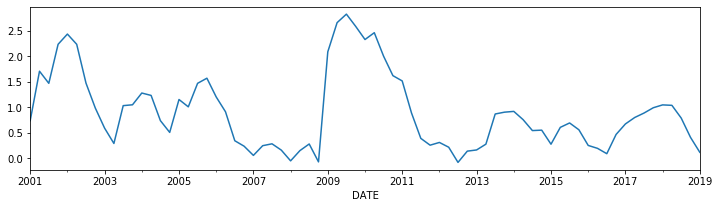

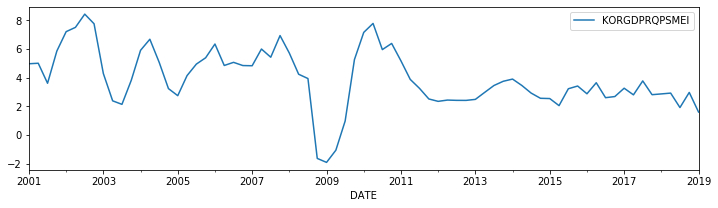

D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:            KORGDPRQPSMEI   No. Observations:                   69
Model:             MarkovAutoregression   Log Likelihood                 -87.104
Date:                  Thu, 30 Apr 2020   AIC                            240.208
Time:                          16:29:16   BIC                            313.933
Sample:                      01-01-2001   HQIC                           269.457
                           - 01-01-2019                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9222      0.536      5.456      0.000       1.873       3.972
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5976      0.578      2.764      0.006       0.465       2.730
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5242      0.536      8.443      0.000       3.474       5.574
                             Regime 3 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7194      0.541      6.877      0.000       2.659       4.780
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.2709      0.053      5.122      0.000       0.167       0.375
ar.L1          1.7214      0.167     10.282      0.000       1.393       2.049
ar.L2         -1.1062      0.360     -3.072      0.002      -1.812      -0.400
ar.L3          0.0640      0.344      0.186      0.852      -0.610       0.738
ar.L4          0.1924      0.150      1.284      0.199      -0.101       0.486
                           Regime transition parameters                          
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
p[0->0].tvtp0    11.6012    890.746      0.013      0.990   -1734.229    1757.432
p[1->0].tvtp0    -1.5031   1.59e+04  -9.43e-05      1.000   -3.13e+04    3.13e+04
p[2->0].tvtp0     0.3353      1.351      0.248      0.804      -2.313       2.983
p[3->0].tvtp0    -1.1232      3.249     -0.346      0.730      -7.492       5.246
p[0->0].tvtp1     1.7851   4368.487      0.000      1.000   -8560.292    8563.862
p[1->0].tvtp1     7.8798   7710.832      0.001      0.999   -1.51e+04    1.51e+04
p[2->0].tvtp1    -4.5030      3.792     -1.188      0.235     -11.935       2.929
p[3->0].tvtp1     1.9428      

In [3]:
result, model = rm.SOP_Phase_1(sk_gdp_chg, 'Markov_Filardo', 4, 4, exog = sk_spread.iloc[:,0])
result.summary()

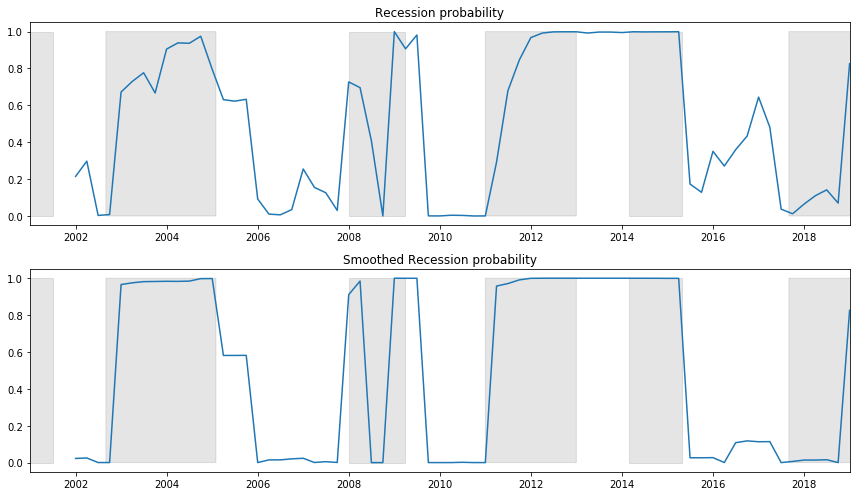

0.5167997100073252
precision =  1.9349856059048987
0.5040782732133992
smooth_precision =  1.9838188891284643


In [4]:
rm.rec_prob_graph(result, skrec, datetime(2001,1,1), datetime(2019,1,1))

In [10]:
result.expected_durations.dropna()[0].mean()

8.480667622791938